In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

In [3]:
ckd = pd.read_csv("/home/ijaju/Documents/datasets/ckd.csv")

In [7]:
class_types = ['rbc','pc','pcc','ba','htn','dm','cad','appet','pe','ane']
for i in ckd.columns:
    for j in class_types:
        if i==j:
            e = ckd[j].unique()
            ckd[j] = np.where(ckd[j]==e[0],-1,1)

In [9]:
X = ckd.iloc[:,0:23].values
y = ckd.iloc[:,24].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [4]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1)

In [10]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [11]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8867924528301887

In [41]:
acc = []
for i in range(1,15):
    clf_test = MLPClassifier(solver = 'lbfgs',hidden_layer_sizes=(1,1),alpha=1e-5,random_state=1,max_iter=i)
    clf_test.fit(X_train,y_train)
    y_pred_ = clf_test.predict(X_test)
    acc.append(1-(accuracy_score(y_test,y_pred_)))

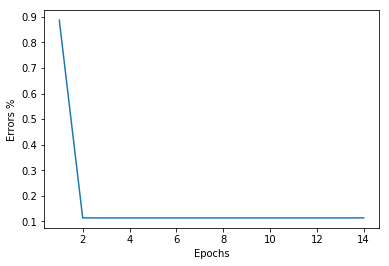

In [45]:
i = range(1,15)
plt.plot(i,acc)
plt.xlabel("Epochs")
plt.ylabel("Errors %")
plt.show()

In [50]:
for i in range(1,5):
    clf_test = MLPClassifier(solver = 'lbfgs',hidden_layer_sizes=(i,1),alpha=1e-5,random_state=1)
    clf_test.fit(X_train,y_train)
    y_pred_ = clf_test.predict(X_test)
    print("For no_of_layers=",i,"accuracy = ",(accuracy_score(y_test,y_pred_)))

For no_of_layers= 1 accuracy =  0.8867924528301887
For no_of_layers= 2 accuracy =  0.8867924528301887
For no_of_layers= 3 accuracy =  0.8867924528301887
For no_of_layers= 4 accuracy =  0.8867924528301887
